# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS-109A Introduction to Data Science

## Lab 10:  Neural Networks using `keras` 

**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors:** Pavlos Protopapas and Kevin Rader<br/>
**Lab Instructor:** Eleni Kaxiras<br/>
**Authors:** David Sondak, Eleni Kaxiras, and Pavlos Protopapas

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get\
    ("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline

## Anatomy of an Artificial Neural Network

In a previous lab we created our own neural network by writing some simple python functions.  We focused on a regression problem where we tried to learn a function. We practiced using the logistic activation function in a network with multiple nodes, but a single or two hidden layers.  Some of the key observations were:
* Increasing the number of nodes allows us to represent more complicated functions  
* The weights and biases have a very big impact on the solution
* Finding the "correct" weights and biases is really hard to do manually
* There must be a better method for determining the weights and biases automatically

We also didn't assess the effects of different activation functions or different network depths. 

### The 3 parts of an ANN

- **Part 1: the input layer** (dimentions are determined from our dataset)
- **Part 2: the internal architecture or hidden layers** (the number of layers, the activation functions, the learnable parameters and other hyperparameters)
- **Part 3: the output layer** (what we want from the network)

### A word about .npy files

Numpy arrays are faster than plain python lists, as we know. Numpy also offers a file format called .npy, which, when it comes to reading the same data multiple times from disk storage, is a lot faster than reading from a csv file. You can save any list or array into this format.

In [3]:
np.save('/tmp/123', np.array([[1, 2, 3], [4, 5, 6]]))
hello = np.load('/tmp/123.npy')

In [4]:
hello

array([[1, 2, 3],
       [4, 5, 6]])

## `Keras` Basics ![](figs/keras.png)
https://keras.io/

Machine learning computations can be quite demanding. TensorFlow is a framework for representing complicated ML algorithms and executing them in any platform, from a phone to a distributed system using GPUs. Developed by Google Brain, TensorFlow is used very broadly today. 

**[`keras`](https://keras.io/)**, is a high-level API used for fast prototyping, advanced research, and production. We will use `tf.keras` which is TensorFlow's implementation of the `keras` API.

### Models are assemblies of layers

The core data structure of Keras is a **model**, a way to organize layers. A model is understood as a sequence or a graph of standalone, fully-configurable modules that can be plugged together with as few restrictions as possible. In particular, neural layers, cost functions, optimizers, initialization schemes, activation functions, regularization schemes are all standalone modules that you can combine to create new models.

The simplest type of model is the **Sequential** model, a linear stack of layers. For more complex architectures, one can use the Keras **Functional** API, which allows to build arbitrary graphs of layers.

https://keras.io/models/model/

Everything you need to know about the Sequential model is here: https://keras.io/models/sequential/

### Keras Installation

If you haven't already, install `Keras` using the instructions found at [https://keras.io/#installation](https://keras.io/#installation)

Choose the TensorFlow installation instructions (found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/) ).

### Example: Approximating a Gaussian using keras
Let's try to redo the problem from last week.  Recall that we had a function

$$
\begin{aligned}
f\left(x\right) = e^{-x^{2}}
\end{aligned}
$$

and we wanted to use a neural network to approximate that function.  This week, we will use `keras` to do the true optimization.

First, we import the necessary `keras` modules.

In [5]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

print(tf.VERSION)
print(tf.keras.__version__)

/Users/bhavenpatel/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0
2.1.6-tf


In [6]:
# Checking if our machine has GPUs. Mine does not..
with tf.Session() as sess:
    devices = sess.list_devices()
    print(devices)

[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 1242922902424397177)]


Before we get started, we need to create some **data**.  We will generate data points from an underlying function (here the Guassian).  Then we will use the `sklearn` `train_test_split` method to split the dataset into training and testing portions.  Remember that we train a machine learning algorithm on the training set and then assess the algorithm's performance on the test set.

In [7]:
from sklearn.model_selection import train_test_split

n_samples = 1050 # set the number of samples to take for each dataset
test_size = 0.3 # set the proportion of data to hold out for testing

# define the function and add noise

def f_gauss(x):
    return np.exp(-x * x) + np.random.normal(loc=0, scale=.1, size = x.shape[0])

X = np.random.permutation(np.linspace(-10, 10, n_samples)) # choose some points from the function
Y = f_gauss(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

Let's plot the data

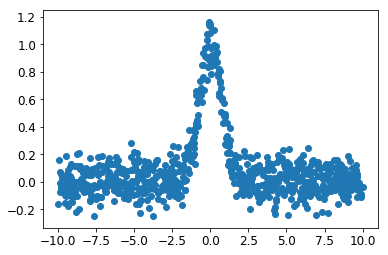

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train)

parameters are learned by the network. the hyperparameters are chosen by the user; can be tuned as well.

### Building a keras network

Now we will create a neural network model with keras. We're going to use a single layer and just 2 neurons in that layer. We will start with the sigmoid activation function. We also choose a linear output layer since we are doing regression. The loss function is selected to be the **mean squared error (MSE)**. In addition to these choices we must also specify our initial weights as well as the optimization method that will be used to minimize the loss function. The keras interface has many choises as to those hyperparameters.

**Part 1:** First we start by defining the number of nodes in a layer and the input dimensions. If we have more than one layer we might need to define a value for the number of nodes (H) for each layer.

`H = 
input_dim =`

Then we instantiate the model

`model = models.Sequential() `

**Part 2:** Then we add the hidden layers. Adding layers and stacking them is done using `.add()`

`model.add(layers.Dense(H, input_dim=input_dim,  
                activation='sigmoid')) `

**An alternative way** 

`model = Sequential([
    Dense(200, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(4, activation='linear')
])`

**Part 3:** We end with the final layer (output)

`model.add(layers.Dense(1, 
                activation='linear')) `
                
Our model is not ready yet. We need to configure its learning process with .compile():

`model.compile(loss='mean_squared_error', optimizer='sgd')`

If you need to, you can further configure your optimizer. A core principle of Keras is to make things reasonably simple, while allowing the user to be fully in control when they need to (the ultimate control being the easy extensibility of the source code)

`model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01))`
              
Our model is now ready to use. We haven't trained it yet, but we'll do that now using the fit method. Notice that we also need to specify the batch size for the stochastic gradient decent algorithm as well as the number of epochs to run.

`model.fit(X_train, Y_train, batch_size=100, epochs=100)#, verbose=1)`

<div class="exercise"><b>Exercise 1:</b> </div>

Build a NN with one hidden layer with **2 neurons**. Use the `tanh` activation function. Train the model using the X_train dataset from above (train the model in this case means run `.compile` and `.fit`).

In [ ]:
# your code here


In [10]:
# %load solutions/NN_1_layer_2_nodes.py
H = 2 # number of nodes in the layer
input_dim = 1 # input dimension: just x

model = models.Sequential() # create sequential multi-layer perceptron

# our first hidden layer with two nodes
model.add(layers.Dense(H, input_dim=input_dim, activation='tanh') );

# add output layer
model.add(layers.Dense(1, activation='linear') );

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model_history = model.fit(X_train, Y_train, batch_size=100, epochs=100, verbose=1)


Epoch 1/100
735/735 [==============================] - 0s 374us/step - loss: 0.2427
Epoch 2/100
735/735 [==============================] - 0s 15us/step - loss: 0.2267
Epoch 3/100
735/735 [==============================] - 0s 18us/step - loss: 0.2110
Epoch 4/100
735/735 [==============================] - 0s 15us/step - loss: 0.1965
Epoch 5/100
735/735 [==============================] - 0s 17us/step - loss: 0.1826
Epoch 6/100
735/735 [==============================] - 0s 20us/step - loss: 0.1701
Epoch 7/100
735/735 [==============================] - 0s 17us/step - loss: 0.1584
Epoch 8/100
735/735 [==============================] - 0s 16us/step - loss: 0.1476
Epoch 9/100
735/735 [==============================] - 0s 17us/step - loss: 0.1377
Epoch 10/100
735/735 [==============================] - 0s 21us/step - loss: 0.1287
Epoch 11/100
735/735 [==============================] - 0s 17us/step - loss: 0.1203
Epoch 12/100
735/735 [==============================] - 0s 14us/step - loss: 0.1127


Great!  We've trained a model.  Now it's time to explore the results.  Notice the loss function.

In [11]:
# Some constants for our plots
FIG_SIZE = (10,5)
FONT_SIZE = 10
LABEL_SIZE = 15

In [12]:
# use our model to predict in the range we want
X_range = np.linspace(-10, 10, 1000)
y_pred = model.predict(X_range)

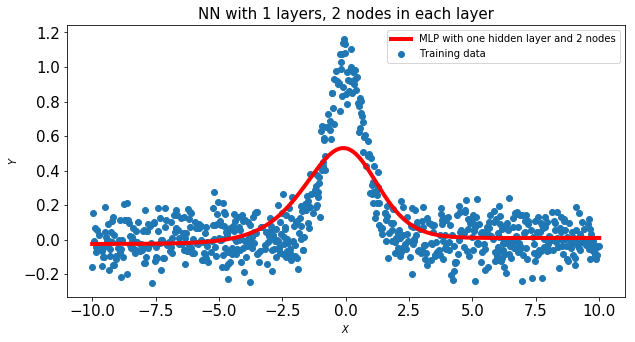

In [13]:
# Plot the results
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'MLP with one hidden layer and {H} nodes')
ax.set_xlabel(r'$X$', fontsize=FONT_SIZE)
ax.set_ylabel(r'$Y$', fontsize=FONT_SIZE)
ax.set_title(f'NN with {len(model_history.model.layers)-1} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=LABEL_SIZE)

ax.legend(loc=0, fontsize=FONT_SIZE)

plt.show()

<div class="exercise"><b>Exercise 2:</b></div>

Change the number of neurons in the layer. Try changing the activation function to `reLU`.  Can you get better results?  What worked the best?

In [22]:
H = 40 # number of nodes in the layer
input_dim = 1 # input dimension: just x

model16 = models.Sequential() # create sequential multi-layer perceptron

# our first hidden layer with two nodes
model16.add(layers.Dense(H, input_dim=input_dim, activation='relu') );

# add output layer
model16.add(layers.Dense(1, activation='linear') );

# compile the model
model16.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model16_history = model16.fit(X_train, Y_train, batch_size=100, epochs=100, verbose=1)


Epoch 1/100
735/735 [==============================] - 0s 375us/step - loss: 0.1996
Epoch 2/100
735/735 [==============================] - 0s 17us/step - loss: 0.0960
Epoch 3/100
735/735 [==============================] - 0s 24us/step - loss: 0.0744
Epoch 4/100
735/735 [==============================] - 0s 17us/step - loss: 0.0746
Epoch 5/100
735/735 [==============================] - 0s 16us/step - loss: 0.0669
Epoch 6/100
735/735 [==============================] - 0s 21us/step - loss: 0.0623
Epoch 7/100
735/735 [==============================] - 0s 23us/step - loss: 0.0595
Epoch 8/100
735/735 [==============================] - 0s 17us/step - loss: 0.0563
Epoch 9/100
735/735 [==============================] - 0s 16us/step - loss: 0.0540
Epoch 10/100
735/735 [==============================] - 0s 28us/step - loss: 0.0521
Epoch 11/100
735/735 [==============================] - 0s 22us/step - loss: 0.0504
Epoch 12/100
735/735 [==============================] - 0s 23us/step - loss: 0.0494


In [26]:
# %load solutions/NN_1_layer_16_nodes.py

H = 40 # number of nodes in the layer
input_dim = 1 # input dimension: just x

model2 = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model2.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='relu')) 
# layer 1
model2.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# compile the model
model2.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model2_history = model2.fit(X_train, Y_train, batch_size=256, epochs=1200, verbose=1, \
                          shuffle = True, validation_split=0.5)


Train on 367 samples, validate on 368 samples
Epoch 1/1200
367/367 [==============================] - 0s 937us/step - loss: 0.0615 - val_loss: 0.0863
Epoch 2/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0606 - val_loss: 0.0855
Epoch 3/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0601 - val_loss: 0.0847
Epoch 4/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0597 - val_loss: 0.0840
Epoch 5/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0592 - val_loss: 0.0832
Epoch 6/1200
367/367 [==============================] - 0s 21us/step - loss: 0.0587 - val_loss: 0.0825
Epoch 7/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0582 - val_loss: 0.0819
Epoch 8/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0577 - val_loss: 0.0812
Epoch 9/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0572 - val_loss: 0.0805
Epoch 10/1200
367/367 [===

367/367 [==============================] - 0s 15us/step - loss: 0.0289 - val_loss: 0.0343
Epoch 158/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0287 - val_loss: 0.0342
Epoch 159/1200
367/367 [==============================] - 0s 23us/step - loss: 0.0287 - val_loss: 0.0342
Epoch 160/1200
367/367 [==============================] - 0s 21us/step - loss: 0.0287 - val_loss: 0.0340
Epoch 161/1200
367/367 [==============================] - 0s 21us/step - loss: 0.0286 - val_loss: 0.0340
Epoch 162/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0287 - val_loss: 0.0340
Epoch 163/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0286 - val_loss: 0.0339
Epoch 164/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0285 - val_loss: 0.0339
Epoch 165/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0284 - val_loss: 0.0339
Epoch 166/1200
367/367 [==============================] - 0s 20us/step

367/367 [==============================] - 0s 21us/step - loss: 0.0235 - val_loss: 0.0272
Epoch 314/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0235 - val_loss: 0.0272
Epoch 315/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0234 - val_loss: 0.0272
Epoch 316/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0235 - val_loss: 0.0272
Epoch 317/1200
367/367 [==============================] - 0s 21us/step - loss: 0.0235 - val_loss: 0.0270
Epoch 318/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0234 - val_loss: 0.0269
Epoch 319/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0234 - val_loss: 0.0268
Epoch 320/1200
367/367 [==============================] - 0s 25us/step - loss: 0.0234 - val_loss: 0.0268
Epoch 321/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0233 - val_loss: 0.0271
Epoch 322/1200
367/367 [==============================] - 0s 22us/step

367/367 [==============================] - 0s 20us/step - loss: 0.0193 - val_loss: 0.0222
Epoch 470/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0193 - val_loss: 0.0221
Epoch 471/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0193 - val_loss: 0.0219
Epoch 472/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0193 - val_loss: 0.0218
Epoch 473/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0192 - val_loss: 0.0221
Epoch 474/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0192 - val_loss: 0.0223
Epoch 475/1200
367/367 [==============================] - 0s 21us/step - loss: 0.0192 - val_loss: 0.0221
Epoch 476/1200
367/367 [==============================] - 0s 40us/step - loss: 0.0191 - val_loss: 0.0220
Epoch 477/1200
367/367 [==============================] - 0s 34us/step - loss: 0.0191 - val_loss: 0.0219
Epoch 478/1200
367/367 [==============================] - 0s 18us/step

367/367 [==============================] - 0s 18us/step - loss: 0.0161 - val_loss: 0.0183
Epoch 626/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0163 - val_loss: 0.0180
Epoch 627/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0160 - val_loss: 0.0180
Epoch 628/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0162 - val_loss: 0.0180
Epoch 629/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0160 - val_loss: 0.0182
Epoch 630/1200
367/367 [==============================] - 0s 21us/step - loss: 0.0161 - val_loss: 0.0181
Epoch 631/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0160 - val_loss: 0.0179
Epoch 632/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0160 - val_loss: 0.0178
Epoch 633/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0160 - val_loss: 0.0179
Epoch 634/1200
367/367 [==============================] - 0s 19us/step

367/367 [==============================] - 0s 19us/step - loss: 0.0142 - val_loss: 0.0154
Epoch 782/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0138 - val_loss: 0.0155
Epoch 783/1200
367/367 [==============================] - 0s 23us/step - loss: 0.0139 - val_loss: 0.0158
Epoch 784/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0140 - val_loss: 0.0153
Epoch 785/1200
367/367 [==============================] - 0s 23us/step - loss: 0.0138 - val_loss: 0.0154
Epoch 786/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0141 - val_loss: 0.0151
Epoch 787/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0137 - val_loss: 0.0155
Epoch 788/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0139 - val_loss: 0.0153
Epoch 789/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0138 - val_loss: 0.0151
Epoch 790/1200
367/367 [==============================] - 0s 22us/step

367/367 [==============================] - 0s 18us/step - loss: 0.0123 - val_loss: 0.0135
Epoch 938/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0123 - val_loss: 0.0132
Epoch 939/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0123 - val_loss: 0.0133
Epoch 940/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0124 - val_loss: 0.0132
Epoch 941/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0124 - val_loss: 0.0133
Epoch 942/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0122 - val_loss: 0.0133
Epoch 943/1200
367/367 [==============================] - 0s 20us/step - loss: 0.0123 - val_loss: 0.0132
Epoch 944/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0122 - val_loss: 0.0132
Epoch 945/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0122 - val_loss: 0.0132
Epoch 946/1200
367/367 [==============================] - 0s 21us/step

367/367 [==============================] - 0s 26us/step - loss: 0.0117 - val_loss: 0.0131
Epoch 1016/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0119 - val_loss: 0.0127
Epoch 1017/1200
367/367 [==============================] - 0s 44us/step - loss: 0.0117 - val_loss: 0.0125
Epoch 1018/1200
367/367 [==============================] - 0s 23us/step - loss: 0.0119 - val_loss: 0.0125
Epoch 1019/1200
367/367 [==============================] - 0s 21us/step - loss: 0.0118 - val_loss: 0.0126
Epoch 1020/1200
367/367 [==============================] - 0s 21us/step - loss: 0.0118 - val_loss: 0.0128
Epoch 1021/1200
367/367 [==============================] - 0s 25us/step - loss: 0.0117 - val_loss: 0.0125
Epoch 1022/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0117 - val_loss: 0.0125
Epoch 1023/1200
367/367 [==============================] - 0s 24us/step - loss: 0.0117 - val_loss: 0.0125
Epoch 1024/1200
367/367 [==============================] - 0s 

367/367 [==============================] - 0s 19us/step - loss: 0.0113 - val_loss: 0.0116
Epoch 1170/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0109 - val_loss: 0.0119
Epoch 1171/1200
367/367 [==============================] - 0s 25us/step - loss: 0.0113 - val_loss: 0.0116
Epoch 1172/1200
367/367 [==============================] - 0s 21us/step - loss: 0.0112 - val_loss: 0.0116
Epoch 1173/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0110 - val_loss: 0.0117
Epoch 1174/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0109 - val_loss: 0.0117
Epoch 1175/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0110 - val_loss: 0.0116
Epoch 1176/1200
367/367 [==============================] - 0s 21us/step - loss: 0.0109 - val_loss: 0.0116
Epoch 1177/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0110 - val_loss: 0.0116
Epoch 1178/1200
367/367 [==============================] - 0s 

Is the loss smaller now? You may access the results in a model by its `.history`

In [27]:
model16_history.history['loss'][-1]

0.018115125875286506

Again let's use the new model to predict:

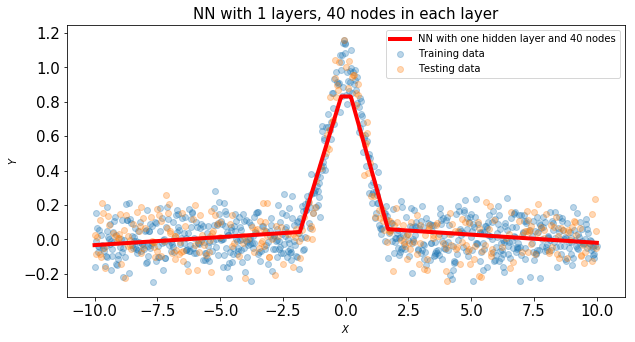

In [29]:
# use our model to predict in the range we want
X_range = np.linspace(-10, 10, 1000)
y_pred = model2.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
ax.scatter(X_train, Y_train, label='Training data', alpha=0.3)
ax.scatter(X_test, Y_test, label='Testing data' , alpha=0.3)
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN with one hidden layer and {H} nodes')
ax.set_xlabel(r'$X$', fontsize=FONT_SIZE)
ax.set_ylabel(r'$Y$', fontsize=FONT_SIZE)
ax.set_title(f'NN with {len(model2_history.model.layers)-1} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=LABEL_SIZE)

ax.legend(loc=0, fontsize=FONT_SIZE)

plt.show()

<div class="exercise"><b>Exercise 3:</b>
</div>

Plot the loss function as a function of the epochs. <b>Hint:</b> You can access the loss function values with the command:`model_history.history['loss']`



In [ ]:
# your code here


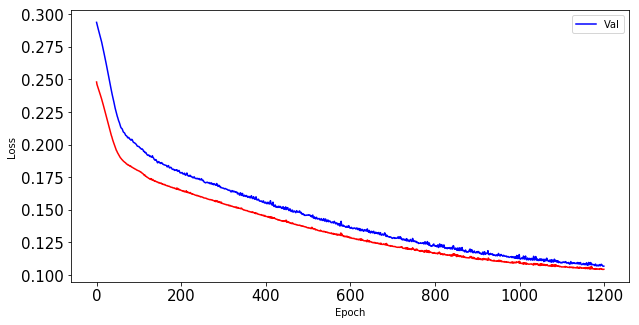

In [31]:
# %load solutions/print_history.py
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
ax.plot(np.sqrt(model2_history.history['loss']), 'r')
ax.plot(np.sqrt(model2_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=FONT_SIZE)
ax.set_ylabel(r'Loss', fontsize=FONT_SIZE)
ax.legend()
ax.tick_params(labelsize=LABEL_SIZE)


How good is the model?  We can compute the $R^{2}$ score to get a sense of the model performance.

In [32]:
# evaluate the training and testing performance of your model 
# note: you should extract and check both the loss function and your evaluation metric
from sklearn.metrics import r2_score as r2

train_score = model.evaluate(X_train, Y_train, verbose=1)
print('Train loss:', train_score)
print('Train R2:', r2(Y_train, model.predict(X_train)))

test_score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', test_score)
print('Test R2:', r2(Y_test, model.predict(X_test)))

735/735 [==============================] - 0s 149us/step
Train loss: 0.023916935971399555
Train R2: 0.6303734832840676
315/315 [==============================] - 0s 31us/step
Test loss: 0.026080995555671435
Test R2: 0.6061098128714042


<div class="exercise"><b>Exercise 4</b> </div>

Let's add more layers. Fix the width $H$ and fit a MLP network with <b>multiple</b> hidden layers, each with the same width. Start with logistic or hyperbolic-tan activation functions for the hidden nodes and linear activation for the output. Experiment with the number of layers and observe the effect of this on the quality of the fit.

In [ ]:
# %load solutions/NN_10_layers_100_nodes.py

# number of hidden nodes
H =  100
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model3 = models.Sequential()
# layer 0
model3.add(layers.Dense(H, input_dim=input_dim,  
                activation='tanh')) 
# layer 1
model3.add(layers.Dense(H,
                activation='tanh')) 
# layer 2
model3.add(layers.Dense(H,
                activation='tanh')) 
# layer 3
model3.add(layers.Dense(H,  
                activation='tanh')) 
# layer 4
model3.add(layers.Dense(H,  
                activation='tanh')) 
# layer 5
model3.add(layers.Dense(H,  
                activation='tanh')) 
# layer 6
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 7
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 8
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 9
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 10 - output
model3.add(layers.Dense(1, 
                activation='linear')) 


In [35]:
# %load solutions/NN_10_layers_100_nodes.py

# number of hidden nodes
H =  100
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model3 = models.Sequential()

#add 10 hidden layers
for i in range(9):
    model3.add(layers.Dense(H, input_dim=input_dim, activation='tanh')) 

# layer 10 - output
model3.add(layers.Dense(1, 
                activation='linear')) 


In [36]:
# configure the model
model3.compile(loss='mean_squared_error', optimizer='adam')

In [37]:
# fit the model - INTENSIVE
model3_history = model3.fit(X_train, Y_train, batch_size=256, epochs=1500, verbose=1, \
                            shuffle = True, validation_split=0.3)

Train on 514 samples, validate on 221 samples
Epoch 1/1500
514/514 [==============================] - 1s 2ms/step - loss: 0.8693 - val_loss: 0.2847
Epoch 2/1500
514/514 [==============================] - 0s 41us/step - loss: 0.4050 - val_loss: 0.0686
Epoch 3/1500
514/514 [==============================] - 0s 53us/step - loss: 0.1593 - val_loss: 0.2233
Epoch 4/1500
514/514 [==============================] - 0s 53us/step - loss: 0.1484 - val_loss: 0.1235
Epoch 5/1500
514/514 [==============================] - 0s 45us/step - loss: 0.1252 - val_loss: 0.0815
Epoch 6/1500
514/514 [==============================] - 0s 51us/step - loss: 0.0615 - val_loss: 0.0942
Epoch 7/1500
514/514 [==============================] - 0s 52us/step - loss: 0.0948 - val_loss: 0.0656
Epoch 8/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0529 - val_loss: 0.0931
Epoch 9/1500
514/514 [==============================] - 0s 51us/step - loss: 0.0926 - val_loss: 0.0699
Epoch 10/1500
514/514 [=====

514/514 [==============================] - 0s 55us/step - loss: 0.0142 - val_loss: 0.0118
Epoch 158/1500
514/514 [==============================] - 0s 56us/step - loss: 0.0117 - val_loss: 0.0231
Epoch 159/1500
514/514 [==============================] - 0s 55us/step - loss: 0.0245 - val_loss: 0.0224
Epoch 160/1500
514/514 [==============================] - 0s 56us/step - loss: 0.0170 - val_loss: 0.0146
Epoch 161/1500
514/514 [==============================] - 0s 77us/step - loss: 0.0156 - val_loss: 0.0113
Epoch 162/1500
514/514 [==============================] - 0s 70us/step - loss: 0.0107 - val_loss: 0.0156
Epoch 163/1500
514/514 [==============================] - 0s 62us/step - loss: 0.0140 - val_loss: 0.0155
Epoch 164/1500
514/514 [==============================] - 0s 63us/step - loss: 0.0150 - val_loss: 0.0147
Epoch 165/1500
514/514 [==============================] - 0s 61us/step - loss: 0.0140 - val_loss: 0.0116
Epoch 166/1500
514/514 [==============================] - 0s 54us/step

514/514 [==============================] - 0s 49us/step - loss: 0.0103 - val_loss: 0.0133
Epoch 314/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0119 - val_loss: 0.0138
Epoch 315/1500
514/514 [==============================] - 0s 51us/step - loss: 0.0114 - val_loss: 0.0194
Epoch 316/1500
514/514 [==============================] - 0s 52us/step - loss: 0.0194 - val_loss: 0.0203
Epoch 317/1500
514/514 [==============================] - 0s 51us/step - loss: 0.0150 - val_loss: 0.0163
Epoch 318/1500
514/514 [==============================] - 0s 49us/step - loss: 0.0167 - val_loss: 0.0110
Epoch 319/1500
514/514 [==============================] - 0s 52us/step - loss: 0.0133 - val_loss: 0.0228
Epoch 320/1500
514/514 [==============================] - 0s 62us/step - loss: 0.0178 - val_loss: 0.0105
Epoch 321/1500
514/514 [==============================] - 0s 56us/step - loss: 0.0129 - val_loss: 0.0106
Epoch 322/1500
514/514 [==============================] - 0s 50us/step

514/514 [==============================] - 0s 47us/step - loss: 0.0217 - val_loss: 0.0101
Epoch 470/1500
514/514 [==============================] - 0s 46us/step - loss: 0.0108 - val_loss: 0.0106
Epoch 471/1500
514/514 [==============================] - 0s 49us/step - loss: 0.0107 - val_loss: 0.0180
Epoch 472/1500
514/514 [==============================] - 0s 52us/step - loss: 0.0197 - val_loss: 0.0124
Epoch 473/1500
514/514 [==============================] - 0s 58us/step - loss: 0.0123 - val_loss: 0.0289
Epoch 474/1500
514/514 [==============================] - 0s 56us/step - loss: 0.0243 - val_loss: 0.0116
Epoch 475/1500
514/514 [==============================] - 0s 48us/step - loss: 0.0116 - val_loss: 0.0132
Epoch 476/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0117 - val_loss: 0.0161
Epoch 477/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0173 - val_loss: 0.0216
Epoch 478/1500
514/514 [==============================] - 0s 60us/step

514/514 [==============================] - 0s 56us/step - loss: 0.0098 - val_loss: 0.0104
Epoch 626/1500
514/514 [==============================] - 0s 49us/step - loss: 0.0099 - val_loss: 0.0151
Epoch 627/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0137 - val_loss: 0.0136
Epoch 628/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0109 - val_loss: 0.0102
Epoch 629/1500
514/514 [==============================] - 0s 49us/step - loss: 0.0103 - val_loss: 0.0103
Epoch 630/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0102 - val_loss: 0.0116
Epoch 631/1500
514/514 [==============================] - 0s 48us/step - loss: 0.0116 - val_loss: 0.0173
Epoch 632/1500
514/514 [==============================] - 0s 49us/step - loss: 0.0142 - val_loss: 0.0117
Epoch 633/1500
514/514 [==============================] - 0s 56us/step - loss: 0.0102 - val_loss: 0.0133
Epoch 634/1500
514/514 [==============================] - 0s 48us/step

514/514 [==============================] - 0s 59us/step - loss: 0.0104 - val_loss: 0.0140
Epoch 782/1500
514/514 [==============================] - 0s 52us/step - loss: 0.0111 - val_loss: 0.0141
Epoch 783/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0110 - val_loss: 0.0132
Epoch 784/1500
514/514 [==============================] - 0s 52us/step - loss: 0.0112 - val_loss: 0.0119
Epoch 785/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0112 - val_loss: 0.0115
Epoch 786/1500
514/514 [==============================] - 0s 63us/step - loss: 0.0115 - val_loss: 0.0110
Epoch 787/1500
514/514 [==============================] - 0s 75us/step - loss: 0.0106 - val_loss: 0.0102
Epoch 788/1500
514/514 [==============================] - 0s 65us/step - loss: 0.0098 - val_loss: 0.0121
Epoch 789/1500
514/514 [==============================] - 0s 55us/step - loss: 0.0104 - val_loss: 0.0159
Epoch 790/1500
514/514 [==============================] - 0s 55us/step

514/514 [==============================] - 0s 49us/step - loss: 0.0103 - val_loss: 0.0101
Epoch 938/1500
514/514 [==============================] - 0s 60us/step - loss: 0.0096 - val_loss: 0.0113
Epoch 939/1500
514/514 [==============================] - 0s 48us/step - loss: 0.0106 - val_loss: 0.0119
Epoch 940/1500
514/514 [==============================] - 0s 56us/step - loss: 0.0107 - val_loss: 0.0130
Epoch 941/1500
514/514 [==============================] - 0s 55us/step - loss: 0.0105 - val_loss: 0.0120
Epoch 942/1500
514/514 [==============================] - 0s 53us/step - loss: 0.0114 - val_loss: 0.0133
Epoch 943/1500
514/514 [==============================] - 0s 61us/step - loss: 0.0126 - val_loss: 0.0109
Epoch 944/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0104 - val_loss: 0.0148
Epoch 945/1500
514/514 [==============================] - 0s 50us/step - loss: 0.0142 - val_loss: 0.0129
Epoch 946/1500
514/514 [==============================] - 0s 50us/step

514/514 [==============================] - 0s 53us/step - loss: 0.0104 - val_loss: 0.0112
Epoch 1016/1500
514/514 [==============================] - 0s 55us/step - loss: 0.0101 - val_loss: 0.0120
Epoch 1017/1500
514/514 [==============================] - 0s 59us/step - loss: 0.0106 - val_loss: 0.0130
Epoch 1018/1500
514/514 [==============================] - 0s 54us/step - loss: 0.0114 - val_loss: 0.0112
Epoch 1019/1500
514/514 [==============================] - 0s 55us/step - loss: 0.0098 - val_loss: 0.0103
Epoch 1020/1500
514/514 [==============================] - 0s 62us/step - loss: 0.0098 - val_loss: 0.0103
Epoch 1021/1500
514/514 [==============================] - 0s 58us/step - loss: 0.0097 - val_loss: 0.0106
Epoch 1022/1500
514/514 [==============================] - 0s 51us/step - loss: 0.0099 - val_loss: 0.0126
Epoch 1023/1500
514/514 [==============================] - 0s 52us/step - loss: 0.0112 - val_loss: 0.0111
Epoch 1024/1500
514/514 [==============================] - 0s 

514/514 [==============================] - 0s 64us/step - loss: 0.0119 - val_loss: 0.0129
Epoch 1170/1500
514/514 [==============================] - 0s 66us/step - loss: 0.0136 - val_loss: 0.0212
Epoch 1171/1500
514/514 [==============================] - 0s 55us/step - loss: 0.0196 - val_loss: 0.0131
Epoch 1172/1500
514/514 [==============================] - 0s 61us/step - loss: 0.0135 - val_loss: 0.0291
Epoch 1173/1500
514/514 [==============================] - 0s 59us/step - loss: 0.0320 - val_loss: 0.0150
Epoch 1174/1500
514/514 [==============================] - 0s 59us/step - loss: 0.0183 - val_loss: 0.0115
Epoch 1175/1500
514/514 [==============================] - 0s 65us/step - loss: 0.0161 - val_loss: 0.0333
Epoch 1176/1500
514/514 [==============================] - 0s 57us/step - loss: 0.0257 - val_loss: 0.0230
Epoch 1177/1500
514/514 [==============================] - 0s 57us/step - loss: 0.0268 - val_loss: 0.0177
Epoch 1178/1500
514/514 [==============================] - 0s 

514/514 [==============================] - 0s 55us/step - loss: 0.0112 - val_loss: 0.0113
Epoch 1324/1500
514/514 [==============================] - 0s 57us/step - loss: 0.0098 - val_loss: 0.0104
Epoch 1325/1500
514/514 [==============================] - 0s 49us/step - loss: 0.0096 - val_loss: 0.0136
Epoch 1326/1500
514/514 [==============================] - 0s 48us/step - loss: 0.0138 - val_loss: 0.0145
Epoch 1327/1500
514/514 [==============================] - 0s 46us/step - loss: 0.0135 - val_loss: 0.0106
Epoch 1328/1500
514/514 [==============================] - 0s 48us/step - loss: 0.0098 - val_loss: 0.0115
Epoch 1329/1500
514/514 [==============================] - 0s 48us/step - loss: 0.0102 - val_loss: 0.0107
Epoch 1330/1500
514/514 [==============================] - 0s 66us/step - loss: 0.0097 - val_loss: 0.0101
Epoch 1331/1500
514/514 [==============================] - 0s 60us/step - loss: 0.0097 - val_loss: 0.0102
Epoch 1332/1500
514/514 [==============================] - 0s 

514/514 [==============================] - 0s 56us/step - loss: 0.0132 - val_loss: 0.0220
Epoch 1478/1500
514/514 [==============================] - 0s 53us/step - loss: 0.0158 - val_loss: 0.0200
Epoch 1479/1500
514/514 [==============================] - 0s 56us/step - loss: 0.0145 - val_loss: 0.0187
Epoch 1480/1500
514/514 [==============================] - 0s 57us/step - loss: 0.0139 - val_loss: 0.0153
Epoch 1481/1500
514/514 [==============================] - 0s 51us/step - loss: 0.0120 - val_loss: 0.0118
Epoch 1482/1500
514/514 [==============================] - 0s 55us/step - loss: 0.0106 - val_loss: 0.0102
Epoch 1483/1500
514/514 [==============================] - 0s 61us/step - loss: 0.0102 - val_loss: 0.0101
Epoch 1484/1500
514/514 [==============================] - 0s 57us/step - loss: 0.0101 - val_loss: 0.0114
Epoch 1485/1500
514/514 [==============================] - 0s 48us/step - loss: 0.0111 - val_loss: 0.0149
Epoch 1486/1500
514/514 [==============================] - 0s 

In [38]:
len(model3_history.model.layers)

10

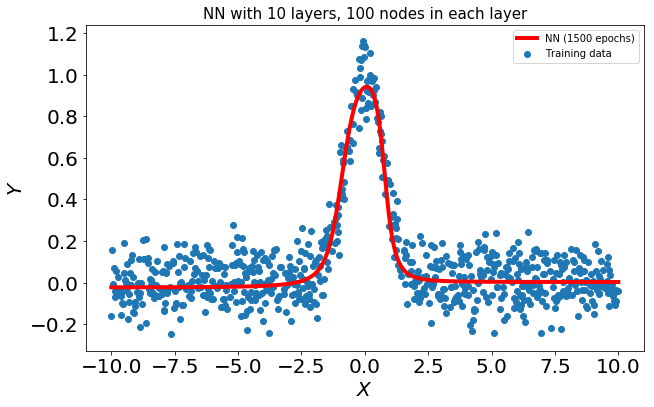

In [40]:
# use our model to predict in the range we want
num_epochs = f'{len(model3_history.epoch)}'

X_range = np.linspace(-10, 10, 500)
y_pred = model3.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN ({num_epochs} epochs)')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title(f'NN with {len(model3_history.model.layers)} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=20)

ax.legend(loc=0)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model2_history.history['loss']), 'r')
ax.plot(np.sqrt(model2_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [ ]:
# evaluate the training and testing performance of your model 
# note: you should extract and check both the loss function and your evaluation metric
score = model2.evaluate(X_train, Y_train, verbose=1)
print('Train loss:', score)
print('Train R2:', r2(Y_train, model2.predict(X_train)))

In [ ]:
score = model2.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score)
print('Test R2:', r2(Y_test, model2.predict(X_test)))

We got a better score this time.

### Overfitting the model



<div class="exercise"><b>Exercise 5</b> </div>

Usually we want to avoid overfitting of the data to our model. But here we want to achive overfitting! So we can regularize! There are a few reasons why a model overfits. One is the lack of data. So we will try to overfit by reducing the data. Try that with model3 and see if it overfits.

In [41]:
# Having very few points in our data
from sklearn.model_selection import train_test_split

In [42]:
n_samples = 50 # set the number of samples to take for each dataset
test_size = 0.3 # set the proportion of data to hold out for testing

# define the function and add noise

def f_gauss(x):
    return np.exp(-x * x) + np.random.normal(loc=0, scale=.1, size = x.shape[0])

X = np.random.permutation(np.linspace(-10, 10, n_samples)) # choose some points from the function
Y = f_gauss(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

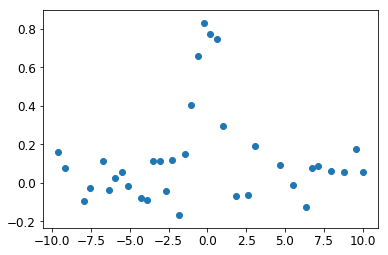

In [43]:
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train)

In [44]:
# number of hidden nodes
H =  100
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model4 = models.Sequential()

#add 10 hidden layers
for i in range(9):
    model4.add(layers.Dense(H, input_dim=input_dim, activation='tanh')) 

# layer 10 - output
model4.add(layers.Dense(1, 
                activation='linear')) 

In [45]:
# configure the model
model4.compile(loss='mean_squared_error', optimizer='adam')

In [46]:
# fit the model - INTENSIVE
model4_history = model4.fit(X_train, Y_train, batch_size=256, epochs=1500, verbose=1, \
                            shuffle = True, validation_split=0.2)

Train on 28 samples, validate on 7 samples
Epoch 1/1500
28/28 [==============================] - 1s 47ms/step - loss: 0.1120 - val_loss: 0.6273
Epoch 2/1500
28/28 [==============================] - 0s 199us/step - loss: 0.8437 - val_loss: 0.0556
Epoch 3/1500
28/28 [==============================] - 0s 209us/step - loss: 0.1162 - val_loss: 0.2584
Epoch 4/1500
28/28 [==============================] - 0s 209us/step - loss: 0.2696 - val_loss: 0.3140
Epoch 5/1500
28/28 [==============================] - 0s 207us/step - loss: 0.3151 - val_loss: 0.1331
Epoch 6/1500
28/28 [==============================] - 0s 208us/step - loss: 0.1231 - val_loss: 0.0451
Epoch 7/1500
28/28 [==============================] - 0s 260us/step - loss: 0.0690 - val_loss: 0.1097
Epoch 8/1500
28/28 [==============================] - 0s 242us/step - loss: 0.1759 - val_loss: 0.1012
Epoch 9/1500
28/28 [==============================] - 0s 210us/step - loss: 0.1537 - val_loss: 0.0489
Epoch 10/1500
28/28 [===================

Epoch 81/1500
28/28 [==============================] - 0s 190us/step - loss: 0.0069 - val_loss: 0.0268
Epoch 82/1500
28/28 [==============================] - 0s 216us/step - loss: 0.0069 - val_loss: 0.0267
Epoch 83/1500
28/28 [==============================] - 0s 210us/step - loss: 0.0069 - val_loss: 0.0265
Epoch 84/1500
28/28 [==============================] - 0s 227us/step - loss: 0.0068 - val_loss: 0.0265
Epoch 85/1500
28/28 [==============================] - 0s 213us/step - loss: 0.0069 - val_loss: 0.0268
Epoch 86/1500
28/28 [==============================] - 0s 213us/step - loss: 0.0068 - val_loss: 0.0272
Epoch 87/1500
28/28 [==============================] - 0s 280us/step - loss: 0.0068 - val_loss: 0.0275
Epoch 88/1500
28/28 [==============================] - 0s 244us/step - loss: 0.0068 - val_loss: 0.0277
Epoch 89/1500
28/28 [==============================] - 0s 215us/step - loss: 0.0068 - val_loss: 0.0276
Epoch 90/1500
28/28 [==============================] - 0s 225us/step - lo

Epoch 160/1500
28/28 [==============================] - 0s 228us/step - loss: 0.0065 - val_loss: 0.0263
Epoch 161/1500
28/28 [==============================] - 0s 155us/step - loss: 0.0065 - val_loss: 0.0262
Epoch 162/1500
28/28 [==============================] - 0s 210us/step - loss: 0.0065 - val_loss: 0.0262
Epoch 163/1500
28/28 [==============================] - 0s 183us/step - loss: 0.0065 - val_loss: 0.0262
Epoch 164/1500
28/28 [==============================] - 0s 210us/step - loss: 0.0065 - val_loss: 0.0261
Epoch 165/1500
28/28 [==============================] - 0s 246us/step - loss: 0.0065 - val_loss: 0.0261
Epoch 166/1500
28/28 [==============================] - 0s 262us/step - loss: 0.0065 - val_loss: 0.0261
Epoch 167/1500
28/28 [==============================] - 0s 181us/step - loss: 0.0065 - val_loss: 0.0260
Epoch 168/1500
28/28 [==============================] - 0s 194us/step - loss: 0.0065 - val_loss: 0.0260
Epoch 169/1500
28/28 [==============================] - 0s 257us

Epoch 239/1500
28/28 [==============================] - 0s 187us/step - loss: 0.0064 - val_loss: 0.0242
Epoch 240/1500
28/28 [==============================] - 0s 166us/step - loss: 0.0064 - val_loss: 0.0242
Epoch 241/1500
28/28 [==============================] - 0s 187us/step - loss: 0.0064 - val_loss: 0.0241
Epoch 242/1500
28/28 [==============================] - 0s 251us/step - loss: 0.0064 - val_loss: 0.0241
Epoch 243/1500
28/28 [==============================] - 0s 231us/step - loss: 0.0064 - val_loss: 0.0241
Epoch 244/1500
28/28 [==============================] - 0s 231us/step - loss: 0.0064 - val_loss: 0.0241
Epoch 245/1500
28/28 [==============================] - 0s 202us/step - loss: 0.0063 - val_loss: 0.0241
Epoch 246/1500
28/28 [==============================] - 0s 190us/step - loss: 0.0063 - val_loss: 0.0241
Epoch 247/1500
28/28 [==============================] - 0s 221us/step - loss: 0.0063 - val_loss: 0.0241
Epoch 248/1500
28/28 [==============================] - 0s 285us

Epoch 318/1500
28/28 [==============================] - 0s 265us/step - loss: 0.0062 - val_loss: 0.0245
Epoch 319/1500
28/28 [==============================] - 0s 219us/step - loss: 0.0062 - val_loss: 0.0245
Epoch 320/1500
28/28 [==============================] - 0s 197us/step - loss: 0.0061 - val_loss: 0.0245
Epoch 321/1500
28/28 [==============================] - 0s 151us/step - loss: 0.0061 - val_loss: 0.0246
Epoch 322/1500
28/28 [==============================] - 0s 199us/step - loss: 0.0061 - val_loss: 0.0246
Epoch 323/1500
28/28 [==============================] - 0s 187us/step - loss: 0.0061 - val_loss: 0.0246
Epoch 324/1500
28/28 [==============================] - 0s 228us/step - loss: 0.0061 - val_loss: 0.0246
Epoch 325/1500
28/28 [==============================] - 0s 204us/step - loss: 0.0061 - val_loss: 0.0247
Epoch 326/1500
28/28 [==============================] - 0s 237us/step - loss: 0.0061 - val_loss: 0.0247
Epoch 327/1500
28/28 [==============================] - 0s 239us

Epoch 397/1500
28/28 [==============================] - 0s 196us/step - loss: 0.0058 - val_loss: 0.0271
Epoch 398/1500
28/28 [==============================] - 0s 256us/step - loss: 0.0058 - val_loss: 0.0272
Epoch 399/1500
28/28 [==============================] - 0s 151us/step - loss: 0.0058 - val_loss: 0.0272
Epoch 400/1500
28/28 [==============================] - 0s 190us/step - loss: 0.0058 - val_loss: 0.0272
Epoch 401/1500
28/28 [==============================] - 0s 221us/step - loss: 0.0058 - val_loss: 0.0273
Epoch 402/1500
28/28 [==============================] - 0s 204us/step - loss: 0.0058 - val_loss: 0.0273
Epoch 403/1500
28/28 [==============================] - 0s 290us/step - loss: 0.0058 - val_loss: 0.0274
Epoch 404/1500
28/28 [==============================] - 0s 234us/step - loss: 0.0058 - val_loss: 0.0274
Epoch 405/1500
28/28 [==============================] - 0s 227us/step - loss: 0.0057 - val_loss: 0.0275
Epoch 406/1500
28/28 [==============================] - 0s 234us

Epoch 476/1500
28/28 [==============================] - 0s 202us/step - loss: 0.0053 - val_loss: 0.0312
Epoch 477/1500
28/28 [==============================] - 0s 186us/step - loss: 0.0053 - val_loss: 0.0313
Epoch 478/1500
28/28 [==============================] - 0s 195us/step - loss: 0.0053 - val_loss: 0.0313
Epoch 479/1500
28/28 [==============================] - 0s 193us/step - loss: 0.0053 - val_loss: 0.0314
Epoch 480/1500
28/28 [==============================] - 0s 299us/step - loss: 0.0053 - val_loss: 0.0314
Epoch 481/1500
28/28 [==============================] - 0s 231us/step - loss: 0.0053 - val_loss: 0.0315
Epoch 482/1500
28/28 [==============================] - 0s 236us/step - loss: 0.0053 - val_loss: 0.0315
Epoch 483/1500
28/28 [==============================] - 0s 217us/step - loss: 0.0053 - val_loss: 0.0316
Epoch 484/1500
28/28 [==============================] - 0s 326us/step - loss: 0.0053 - val_loss: 0.0316
Epoch 485/1500
28/28 [==============================] - 0s 312us

Epoch 555/1500
28/28 [==============================] - 0s 210us/step - loss: 0.0049 - val_loss: 0.0330
Epoch 556/1500
28/28 [==============================] - 0s 207us/step - loss: 0.0049 - val_loss: 0.0330
Epoch 557/1500
28/28 [==============================] - 0s 300us/step - loss: 0.0049 - val_loss: 0.0330
Epoch 558/1500
28/28 [==============================] - 0s 223us/step - loss: 0.0049 - val_loss: 0.0330
Epoch 559/1500
28/28 [==============================] - 0s 213us/step - loss: 0.0049 - val_loss: 0.0330
Epoch 560/1500
28/28 [==============================] - 0s 213us/step - loss: 0.0049 - val_loss: 0.0330
Epoch 561/1500
28/28 [==============================] - 0s 229us/step - loss: 0.0049 - val_loss: 0.0330
Epoch 562/1500
28/28 [==============================] - 0s 227us/step - loss: 0.0049 - val_loss: 0.0330
Epoch 563/1500
28/28 [==============================] - 0s 226us/step - loss: 0.0049 - val_loss: 0.0330
Epoch 564/1500
28/28 [==============================] - 0s 171us

Epoch 634/1500
28/28 [==============================] - 0s 173us/step - loss: 0.0043 - val_loss: 0.0309
Epoch 635/1500
28/28 [==============================] - 0s 197us/step - loss: 0.0043 - val_loss: 0.0308
Epoch 636/1500
28/28 [==============================] - 0s 221us/step - loss: 0.0043 - val_loss: 0.0308
Epoch 637/1500
28/28 [==============================] - 0s 197us/step - loss: 0.0043 - val_loss: 0.0307
Epoch 638/1500
28/28 [==============================] - 0s 202us/step - loss: 0.0043 - val_loss: 0.0307
Epoch 639/1500
28/28 [==============================] - 0s 216us/step - loss: 0.0043 - val_loss: 0.0306
Epoch 640/1500
28/28 [==============================] - 0s 229us/step - loss: 0.0043 - val_loss: 0.0306
Epoch 641/1500
28/28 [==============================] - 0s 161us/step - loss: 0.0043 - val_loss: 0.0305
Epoch 642/1500
28/28 [==============================] - 0s 208us/step - loss: 0.0043 - val_loss: 0.0305
Epoch 643/1500
28/28 [==============================] - 0s 199us

Epoch 713/1500
28/28 [==============================] - 0s 213us/step - loss: 0.0036 - val_loss: 0.0286
Epoch 714/1500
28/28 [==============================] - 0s 199us/step - loss: 0.0036 - val_loss: 0.0286
Epoch 715/1500
28/28 [==============================] - 0s 210us/step - loss: 0.0037 - val_loss: 0.0286
Epoch 716/1500
28/28 [==============================] - 0s 258us/step - loss: 0.0036 - val_loss: 0.0286
Epoch 717/1500
28/28 [==============================] - 0s 264us/step - loss: 0.0036 - val_loss: 0.0285
Epoch 718/1500
28/28 [==============================] - 0s 236us/step - loss: 0.0036 - val_loss: 0.0286
Epoch 719/1500
28/28 [==============================] - 0s 235us/step - loss: 0.0035 - val_loss: 0.0287
Epoch 720/1500
28/28 [==============================] - 0s 180us/step - loss: 0.0035 - val_loss: 0.0287
Epoch 721/1500
28/28 [==============================] - 0s 186us/step - loss: 0.0035 - val_loss: 0.0287
Epoch 722/1500
28/28 [==============================] - 0s 202us

Epoch 792/1500
28/28 [==============================] - 0s 162us/step - loss: 0.0024 - val_loss: 0.0280
Epoch 793/1500
28/28 [==============================] - 0s 166us/step - loss: 0.0024 - val_loss: 0.0279
Epoch 794/1500
28/28 [==============================] - 0s 198us/step - loss: 0.0024 - val_loss: 0.0279
Epoch 795/1500
28/28 [==============================] - 0s 194us/step - loss: 0.0024 - val_loss: 0.0279
Epoch 796/1500
28/28 [==============================] - 0s 190us/step - loss: 0.0024 - val_loss: 0.0279
Epoch 797/1500
28/28 [==============================] - 0s 252us/step - loss: 0.0023 - val_loss: 0.0279
Epoch 798/1500
28/28 [==============================] - 0s 203us/step - loss: 0.0023 - val_loss: 0.0279
Epoch 799/1500
28/28 [==============================] - 0s 249us/step - loss: 0.0023 - val_loss: 0.0279
Epoch 800/1500
28/28 [==============================] - 0s 229us/step - loss: 0.0023 - val_loss: 0.0279
Epoch 801/1500
28/28 [==============================] - 0s 229us

Epoch 871/1500
28/28 [==============================] - 0s 220us/step - loss: 0.0028 - val_loss: 0.0270
Epoch 872/1500
28/28 [==============================] - 0s 217us/step - loss: 0.0023 - val_loss: 0.0284
Epoch 873/1500
28/28 [==============================] - 0s 276us/step - loss: 0.0019 - val_loss: 0.0289
Epoch 874/1500
28/28 [==============================] - 0s 244us/step - loss: 0.0019 - val_loss: 0.0272
Epoch 875/1500
28/28 [==============================] - 0s 382us/step - loss: 0.0022 - val_loss: 0.0289
Epoch 876/1500
28/28 [==============================] - 0s 230us/step - loss: 0.0023 - val_loss: 0.0274
Epoch 877/1500
28/28 [==============================] - 0s 219us/step - loss: 0.0022 - val_loss: 0.0283
Epoch 878/1500
28/28 [==============================] - 0s 238us/step - loss: 0.0019 - val_loss: 0.0275
Epoch 879/1500
28/28 [==============================] - 0s 239us/step - loss: 0.0019 - val_loss: 0.0274
Epoch 880/1500
28/28 [==============================] - 0s 206us

Epoch 950/1500
28/28 [==============================] - 0s 198us/step - loss: 0.0018 - val_loss: 0.0291
Epoch 951/1500
28/28 [==============================] - 0s 234us/step - loss: 0.0018 - val_loss: 0.0292
Epoch 952/1500
28/28 [==============================] - 0s 258us/step - loss: 0.0018 - val_loss: 0.0292
Epoch 953/1500
28/28 [==============================] - 0s 223us/step - loss: 0.0018 - val_loss: 0.0292
Epoch 954/1500
28/28 [==============================] - 0s 209us/step - loss: 0.0018 - val_loss: 0.0292
Epoch 955/1500
28/28 [==============================] - 0s 183us/step - loss: 0.0018 - val_loss: 0.0292
Epoch 956/1500
28/28 [==============================] - 0s 210us/step - loss: 0.0018 - val_loss: 0.0292
Epoch 957/1500
28/28 [==============================] - 0s 228us/step - loss: 0.0018 - val_loss: 0.0292
Epoch 958/1500
28/28 [==============================] - 0s 227us/step - loss: 0.0018 - val_loss: 0.0292
Epoch 959/1500
28/28 [==============================] - 0s 241us

Epoch 1029/1500
28/28 [==============================] - 0s 287us/step - loss: 0.0018 - val_loss: 0.0296
Epoch 1030/1500
28/28 [==============================] - 0s 255us/step - loss: 0.0018 - val_loss: 0.0296
Epoch 1031/1500
28/28 [==============================] - 0s 228us/step - loss: 0.0018 - val_loss: 0.0296
Epoch 1032/1500
28/28 [==============================] - 0s 176us/step - loss: 0.0018 - val_loss: 0.0296
Epoch 1033/1500
28/28 [==============================] - 0s 194us/step - loss: 0.0018 - val_loss: 0.0296
Epoch 1034/1500
28/28 [==============================] - 0s 185us/step - loss: 0.0018 - val_loss: 0.0296
Epoch 1035/1500
28/28 [==============================] - 0s 204us/step - loss: 0.0018 - val_loss: 0.0296
Epoch 1036/1500
28/28 [==============================] - 0s 208us/step - loss: 0.0018 - val_loss: 0.0296
Epoch 1037/1500
28/28 [==============================] - 0s 246us/step - loss: 0.0018 - val_loss: 0.0296
Epoch 1038/1500
28/28 [==============================] 

28/28 [==============================] - 0s 231us/step - loss: 0.0017 - val_loss: 0.0299
Epoch 1186/1500
28/28 [==============================] - 0s 217us/step - loss: 0.0017 - val_loss: 0.0299
Epoch 1187/1500
28/28 [==============================] - 0s 203us/step - loss: 0.0017 - val_loss: 0.0299
Epoch 1188/1500
28/28 [==============================] - 0s 161us/step - loss: 0.0017 - val_loss: 0.0299
Epoch 1189/1500
28/28 [==============================] - 0s 223us/step - loss: 0.0017 - val_loss: 0.0300
Epoch 1190/1500
28/28 [==============================] - 0s 210us/step - loss: 0.0017 - val_loss: 0.0298
Epoch 1191/1500
28/28 [==============================] - 0s 222us/step - loss: 0.0017 - val_loss: 0.0300
Epoch 1192/1500
28/28 [==============================] - 0s 210us/step - loss: 0.0017 - val_loss: 0.0298
Epoch 1193/1500
28/28 [==============================] - 0s 233us/step - loss: 0.0017 - val_loss: 0.0300
Epoch 1194/1500
28/28 [==============================] - 0s 196us/step 

Epoch 1264/1500
28/28 [==============================] - 0s 256us/step - loss: 0.0017 - val_loss: 0.0299
Epoch 1265/1500
28/28 [==============================] - 0s 230us/step - loss: 0.0017 - val_loss: 0.0300
Epoch 1266/1500
28/28 [==============================] - 0s 223us/step - loss: 0.0017 - val_loss: 0.0298
Epoch 1267/1500
28/28 [==============================] - 0s 183us/step - loss: 0.0017 - val_loss: 0.0301
Epoch 1268/1500
28/28 [==============================] - 0s 234us/step - loss: 0.0017 - val_loss: 0.0298
Epoch 1269/1500
28/28 [==============================] - 0s 234us/step - loss: 0.0017 - val_loss: 0.0301
Epoch 1270/1500
28/28 [==============================] - 0s 245us/step - loss: 0.0017 - val_loss: 0.0298
Epoch 1271/1500
28/28 [==============================] - 0s 187us/step - loss: 0.0017 - val_loss: 0.0301
Epoch 1272/1500
28/28 [==============================] - 0s 259us/step - loss: 0.0017 - val_loss: 0.0297
Epoch 1273/1500
28/28 [==============================] 

28/28 [==============================] - 0s 221us/step - loss: 0.0016 - val_loss: 0.0303
Epoch 1343/1500
28/28 [==============================] - 0s 204us/step - loss: 0.0016 - val_loss: 0.0298
Epoch 1344/1500
28/28 [==============================] - 0s 264us/step - loss: 0.0016 - val_loss: 0.0302
Epoch 1345/1500
28/28 [==============================] - 0s 270us/step - loss: 0.0016 - val_loss: 0.0299
Epoch 1346/1500
28/28 [==============================] - 0s 164us/step - loss: 0.0016 - val_loss: 0.0301
Epoch 1347/1500
28/28 [==============================] - 0s 213us/step - loss: 0.0016 - val_loss: 0.0300
Epoch 1348/1500
28/28 [==============================] - 0s 196us/step - loss: 0.0016 - val_loss: 0.0300
Epoch 1349/1500
28/28 [==============================] - 0s 183us/step - loss: 0.0016 - val_loss: 0.0301
Epoch 1350/1500
28/28 [==============================] - 0s 222us/step - loss: 0.0016 - val_loss: 0.0299
Epoch 1351/1500
28/28 [==============================] - 0s 239us/step 

Epoch 1421/1500
28/28 [==============================] - 0s 227us/step - loss: 0.0016 - val_loss: 0.0312
Epoch 1422/1500
28/28 [==============================] - 0s 198us/step - loss: 0.0016 - val_loss: 0.0295
Epoch 1423/1500
28/28 [==============================] - 0s 154us/step - loss: 0.0016 - val_loss: 0.0311
Epoch 1424/1500
28/28 [==============================] - 0s 231us/step - loss: 0.0016 - val_loss: 0.0299
Epoch 1425/1500
28/28 [==============================] - 0s 209us/step - loss: 0.0016 - val_loss: 0.0305
Epoch 1426/1500
28/28 [==============================] - 0s 261us/step - loss: 0.0016 - val_loss: 0.0305
Epoch 1427/1500
28/28 [==============================] - 0s 214us/step - loss: 0.0016 - val_loss: 0.0299
Epoch 1428/1500
28/28 [==============================] - 0s 203us/step - loss: 0.0016 - val_loss: 0.0310
Epoch 1429/1500
28/28 [==============================] - 0s 184us/step - loss: 0.0016 - val_loss: 0.0298
Epoch 1430/1500
28/28 [==============================] 

28/28 [==============================] - 0s 407us/step - loss: 0.0015 - val_loss: 0.0314
Epoch 1500/1500
28/28 [==============================] - 0s 212us/step - loss: 0.0015 - val_loss: 0.0307


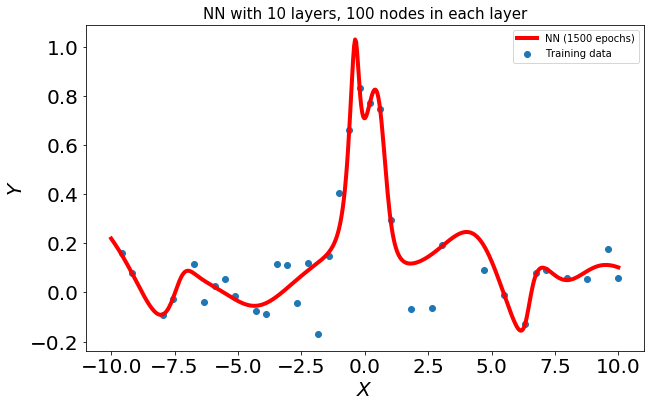

In [47]:
# use our model to predict in the range we want
num_epochs = f'{len(model4_history.epoch)}'

X_range = np.linspace(-10, 10, 500)
y_pred = model4.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN ({num_epochs} epochs)')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title(f'NN with {len(model4_history.model.layers)} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=20)

ax.legend(loc=0)
plt.show()

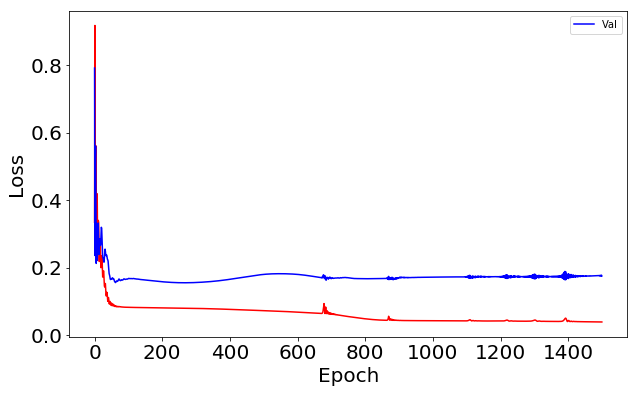

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model4_history.history['loss']), 'r')
ax.plot(np.sqrt(model4_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Regularization

Let's try adding a regularizer in our model: `kernel_regularizer=regularizers.l2(l2)`. Also let's create a function that takes the number of layers and the l2 value as the input and creates the model.

Usage: `def create_dense([10, 20], l2=0.01)` will create a model with two hidden layers of 10 and 20 nodes each, l2=0.01 regularization and num_classes output nodes. 

In [49]:
from keras import regularizers

Using TensorFlow backend.


In [54]:
H =  100  # number of hidden nodes
input_dim = 1

model5 = models.Sequential()

# Input layer of the neural network with ReLU activation function and L2 regularization
model5.add(layers.Dense(H, input_dim=input_dim,  
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
           
# hidden layers
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
# output layer
model5.add(layers.Dense(1, 
                activation='linear')) 

In [56]:
# configure the model
model5.compile(loss='mean_squared_error', optimizer='adam')

In [57]:
# fit the model - INTENSIVE
model5_history = model5.fit(X_train, Y_train, batch_size=256, epochs=1500, verbose=1, \
                            shuffle = True, validation_split=0.2)

Train on 28 samples, validate on 7 samples
Epoch 1/1500
28/28 [==============================] - 1s 44ms/step - loss: 6.5774 - val_loss: 6.1298
Epoch 2/1500
28/28 [==============================] - 0s 172us/step - loss: 6.2509 - val_loss: 6.2109
Epoch 3/1500
28/28 [==============================] - 0s 193us/step - loss: 6.3529 - val_loss: 5.9970
Epoch 4/1500
28/28 [==============================] - 0s 192us/step - loss: 6.0514 - val_loss: 5.9759
Epoch 5/1500
28/28 [==============================] - 0s 182us/step - loss: 5.9873 - val_loss: 6.0607
Epoch 6/1500
28/28 [==============================] - 0s 183us/step - loss: 6.0666 - val_loss: 6.0436
Epoch 7/1500
28/28 [==============================] - 0s 189us/step - loss: 6.0396 - val_loss: 5.9471
Epoch 8/1500
28/28 [==============================] - 0s 179us/step - loss: 5.9312 - val_loss: 5.8721
Epoch 9/1500
28/28 [==============================] - 0s 227us/step - loss: 5.8613 - val_loss: 5.8573
Epoch 10/1500
28/28 [===================

Epoch 81/1500
28/28 [==============================] - 0s 188us/step - loss: 3.6482 - val_loss: 3.6887
Epoch 82/1500
28/28 [==============================] - 0s 225us/step - loss: 3.6216 - val_loss: 3.6614
Epoch 83/1500
28/28 [==============================] - 0s 192us/step - loss: 3.5952 - val_loss: 3.6341
Epoch 84/1500
28/28 [==============================] - 0s 171us/step - loss: 3.5690 - val_loss: 3.6072
Epoch 85/1500
28/28 [==============================] - 0s 160us/step - loss: 3.5429 - val_loss: 3.5809
Epoch 86/1500
28/28 [==============================] - 0s 201us/step - loss: 3.5170 - val_loss: 3.5555
Epoch 87/1500
28/28 [==============================] - 0s 234us/step - loss: 3.4913 - val_loss: 3.5305
Epoch 88/1500
28/28 [==============================] - 0s 219us/step - loss: 3.4657 - val_loss: 3.5058
Epoch 89/1500
28/28 [==============================] - 0s 224us/step - loss: 3.4403 - val_loss: 3.4810
Epoch 90/1500
28/28 [==============================] - 0s 198us/step - lo

Epoch 160/1500
28/28 [==============================] - 0s 220us/step - loss: 2.0389 - val_loss: 2.0904
Epoch 161/1500
28/28 [==============================] - 0s 219us/step - loss: 2.0241 - val_loss: 2.0757
Epoch 162/1500
28/28 [==============================] - 0s 194us/step - loss: 2.0095 - val_loss: 2.0612
Epoch 163/1500
28/28 [==============================] - 0s 205us/step - loss: 1.9949 - val_loss: 2.0468
Epoch 164/1500
28/28 [==============================] - 0s 185us/step - loss: 1.9804 - val_loss: 2.0325
Epoch 165/1500
28/28 [==============================] - 0s 188us/step - loss: 1.9661 - val_loss: 2.0183
Epoch 166/1500
28/28 [==============================] - 0s 257us/step - loss: 1.9519 - val_loss: 2.0042
Epoch 167/1500
28/28 [==============================] - 0s 168us/step - loss: 1.9378 - val_loss: 1.9902
Epoch 168/1500
28/28 [==============================] - 0s 220us/step - loss: 1.9238 - val_loss: 1.9763
Epoch 169/1500
28/28 [==============================] - 0s 181us

Epoch 239/1500
28/28 [==============================] - 0s 205us/step - loss: 1.1680 - val_loss: 1.2270
Epoch 240/1500
28/28 [==============================] - 0s 254us/step - loss: 1.1601 - val_loss: 1.2191
Epoch 241/1500
28/28 [==============================] - 0s 217us/step - loss: 1.1523 - val_loss: 1.2113
Epoch 242/1500
28/28 [==============================] - 0s 237us/step - loss: 1.1445 - val_loss: 1.2036
Epoch 243/1500
28/28 [==============================] - 0s 258us/step - loss: 1.1368 - val_loss: 1.1960
Epoch 244/1500
28/28 [==============================] - 0s 223us/step - loss: 1.1291 - val_loss: 1.1884
Epoch 245/1500
28/28 [==============================] - 0s 236us/step - loss: 1.1215 - val_loss: 1.1808
Epoch 246/1500
28/28 [==============================] - 0s 234us/step - loss: 1.1140 - val_loss: 1.1734
Epoch 247/1500
28/28 [==============================] - 0s 205us/step - loss: 1.1065 - val_loss: 1.1659
Epoch 248/1500
28/28 [==============================] - 0s 260us

Epoch 318/1500
28/28 [==============================] - 0s 263us/step - loss: 0.6978 - val_loss: 0.7611
Epoch 319/1500
28/28 [==============================] - 0s 184us/step - loss: 0.6935 - val_loss: 0.7568
Epoch 320/1500
28/28 [==============================] - 0s 160us/step - loss: 0.6891 - val_loss: 0.7525
Epoch 321/1500
28/28 [==============================] - 0s 224us/step - loss: 0.6849 - val_loss: 0.7483
Epoch 322/1500
28/28 [==============================] - 0s 184us/step - loss: 0.6806 - val_loss: 0.7441
Epoch 323/1500
28/28 [==============================] - 0s 191us/step - loss: 0.6764 - val_loss: 0.7399
Epoch 324/1500
28/28 [==============================] - 0s 208us/step - loss: 0.6722 - val_loss: 0.7357
Epoch 325/1500
28/28 [==============================] - 0s 258us/step - loss: 0.6680 - val_loss: 0.7316
Epoch 326/1500
28/28 [==============================] - 0s 238us/step - loss: 0.6639 - val_loss: 0.7275
Epoch 327/1500
28/28 [==============================] - 0s 229us

Epoch 397/1500
28/28 [==============================] - 0s 209us/step - loss: 0.4353 - val_loss: 0.5018
Epoch 398/1500
28/28 [==============================] - 0s 209us/step - loss: 0.4329 - val_loss: 0.4994
Epoch 399/1500
28/28 [==============================] - 0s 210us/step - loss: 0.4304 - val_loss: 0.4969
Epoch 400/1500
28/28 [==============================] - 0s 189us/step - loss: 0.4280 - val_loss: 0.4945
Epoch 401/1500
28/28 [==============================] - 0s 224us/step - loss: 0.4256 - val_loss: 0.4922
Epoch 402/1500
28/28 [==============================] - 0s 315us/step - loss: 0.4232 - val_loss: 0.4898
Epoch 403/1500
28/28 [==============================] - 0s 204us/step - loss: 0.4208 - val_loss: 0.4874
Epoch 404/1500
28/28 [==============================] - 0s 183us/step - loss: 0.4184 - val_loss: 0.4851
Epoch 405/1500
28/28 [==============================] - 0s 185us/step - loss: 0.4161 - val_loss: 0.4828
Epoch 406/1500
28/28 [==============================] - 0s 154us

Epoch 476/1500
28/28 [==============================] - 0s 201us/step - loss: 0.2847 - val_loss: 0.3537
Epoch 477/1500
28/28 [==============================] - 0s 181us/step - loss: 0.2833 - val_loss: 0.3523
Epoch 478/1500
28/28 [==============================] - 0s 229us/step - loss: 0.2819 - val_loss: 0.3509
Epoch 479/1500
28/28 [==============================] - 0s 233us/step - loss: 0.2805 - val_loss: 0.3495
Epoch 480/1500
28/28 [==============================] - 0s 201us/step - loss: 0.2790 - val_loss: 0.3481
Epoch 481/1500
28/28 [==============================] - 0s 189us/step - loss: 0.2777 - val_loss: 0.3468
Epoch 482/1500
28/28 [==============================] - 0s 238us/step - loss: 0.2763 - val_loss: 0.3454
Epoch 483/1500
28/28 [==============================] - 0s 220us/step - loss: 0.2749 - val_loss: 0.3441
Epoch 484/1500
28/28 [==============================] - 0s 236us/step - loss: 0.2735 - val_loss: 0.3427
Epoch 485/1500
28/28 [==============================] - 0s 262us

Epoch 555/1500
28/28 [==============================] - 0s 211us/step - loss: 0.1967 - val_loss: 0.2678
Epoch 556/1500
28/28 [==============================] - 0s 227us/step - loss: 0.1959 - val_loss: 0.2670
Epoch 557/1500
28/28 [==============================] - 0s 199us/step - loss: 0.1951 - val_loss: 0.2661
Epoch 558/1500
28/28 [==============================] - 0s 337us/step - loss: 0.1942 - val_loss: 0.2653
Epoch 559/1500
28/28 [==============================] - 0s 201us/step - loss: 0.1934 - val_loss: 0.2645
Epoch 560/1500
28/28 [==============================] - 0s 261us/step - loss: 0.1926 - val_loss: 0.2637
Epoch 561/1500
28/28 [==============================] - 0s 238us/step - loss: 0.1918 - val_loss: 0.2629
Epoch 562/1500
28/28 [==============================] - 0s 242us/step - loss: 0.1910 - val_loss: 0.2622
Epoch 563/1500
28/28 [==============================] - 0s 256us/step - loss: 0.1902 - val_loss: 0.2614
Epoch 564/1500
28/28 [==============================] - 0s 217us

Epoch 634/1500
28/28 [==============================] - 0s 182us/step - loss: 0.1449 - val_loss: 0.2175
Epoch 635/1500
28/28 [==============================] - 0s 202us/step - loss: 0.1444 - val_loss: 0.2170
Epoch 636/1500
28/28 [==============================] - 0s 183us/step - loss: 0.1439 - val_loss: 0.2165
Epoch 637/1500
28/28 [==============================] - 0s 208us/step - loss: 0.1434 - val_loss: 0.2160
Epoch 638/1500
28/28 [==============================] - 0s 241us/step - loss: 0.1429 - val_loss: 0.2156
Epoch 639/1500
28/28 [==============================] - 0s 189us/step - loss: 0.1424 - val_loss: 0.2151
Epoch 640/1500
28/28 [==============================] - 0s 218us/step - loss: 0.1419 - val_loss: 0.2146
Epoch 641/1500
28/28 [==============================] - 0s 169us/step - loss: 0.1415 - val_loss: 0.2142
Epoch 642/1500
28/28 [==============================] - 0s 181us/step - loss: 0.1410 - val_loss: 0.2137
Epoch 643/1500
28/28 [==============================] - 0s 221us

Epoch 713/1500
28/28 [==============================] - 0s 233us/step - loss: 0.1141 - val_loss: 0.1879
Epoch 714/1500
28/28 [==============================] - 0s 248us/step - loss: 0.1138 - val_loss: 0.1876
Epoch 715/1500
28/28 [==============================] - 0s 190us/step - loss: 0.1135 - val_loss: 0.1873
Epoch 716/1500
28/28 [==============================] - 0s 214us/step - loss: 0.1132 - val_loss: 0.1870
Epoch 717/1500
28/28 [==============================] - 0s 218us/step - loss: 0.1129 - val_loss: 0.1868
Epoch 718/1500
28/28 [==============================] - 0s 196us/step - loss: 0.1127 - val_loss: 0.1865
Epoch 719/1500
28/28 [==============================] - 0s 195us/step - loss: 0.1124 - val_loss: 0.1862
Epoch 720/1500
28/28 [==============================] - 0s 171us/step - loss: 0.1121 - val_loss: 0.1859
Epoch 721/1500
28/28 [==============================] - 0s 195us/step - loss: 0.1118 - val_loss: 0.1857
Epoch 722/1500
28/28 [==============================] - 0s 196us

Epoch 792/1500
28/28 [==============================] - 0s 231us/step - loss: 0.0958 - val_loss: 0.1705
Epoch 793/1500
28/28 [==============================] - 0s 200us/step - loss: 0.0956 - val_loss: 0.1703
Epoch 794/1500
28/28 [==============================] - 0s 232us/step - loss: 0.0954 - val_loss: 0.1701
Epoch 795/1500
28/28 [==============================] - 0s 226us/step - loss: 0.0953 - val_loss: 0.1700
Epoch 796/1500
28/28 [==============================] - 0s 208us/step - loss: 0.0951 - val_loss: 0.1698
Epoch 797/1500
28/28 [==============================] - 0s 203us/step - loss: 0.0949 - val_loss: 0.1696
Epoch 798/1500
28/28 [==============================] - 0s 241us/step - loss: 0.0947 - val_loss: 0.1695
Epoch 799/1500
28/28 [==============================] - 0s 213us/step - loss: 0.0946 - val_loss: 0.1693
Epoch 800/1500
28/28 [==============================] - 0s 232us/step - loss: 0.0944 - val_loss: 0.1692
Epoch 801/1500
28/28 [==============================] - 0s 204us

Epoch 871/1500
28/28 [==============================] - 0s 202us/step - loss: 0.0848 - val_loss: 0.1602
Epoch 872/1500
28/28 [==============================] - 0s 220us/step - loss: 0.0847 - val_loss: 0.1601
Epoch 873/1500
28/28 [==============================] - 0s 214us/step - loss: 0.0846 - val_loss: 0.1600
Epoch 874/1500
28/28 [==============================] - 0s 271us/step - loss: 0.0845 - val_loss: 0.1599
Epoch 875/1500
28/28 [==============================] - 0s 255us/step - loss: 0.0844 - val_loss: 0.1598
Epoch 876/1500
28/28 [==============================] - 0s 253us/step - loss: 0.0843 - val_loss: 0.1597
Epoch 877/1500
28/28 [==============================] - 0s 269us/step - loss: 0.0842 - val_loss: 0.1596
Epoch 878/1500
28/28 [==============================] - 0s 257us/step - loss: 0.0841 - val_loss: 0.1595
Epoch 879/1500
28/28 [==============================] - 0s 211us/step - loss: 0.0840 - val_loss: 0.1595
Epoch 880/1500
28/28 [==============================] - 0s 207us

Epoch 950/1500
28/28 [==============================] - 0s 209us/step - loss: 0.0782 - val_loss: 0.1542
Epoch 951/1500
28/28 [==============================] - 0s 220us/step - loss: 0.0781 - val_loss: 0.1542
Epoch 952/1500
28/28 [==============================] - 0s 220us/step - loss: 0.0780 - val_loss: 0.1541
Epoch 953/1500
28/28 [==============================] - 0s 256us/step - loss: 0.0780 - val_loss: 0.1540
Epoch 954/1500
28/28 [==============================] - 0s 208us/step - loss: 0.0779 - val_loss: 0.1540
Epoch 955/1500
28/28 [==============================] - 0s 269us/step - loss: 0.0778 - val_loss: 0.1539
Epoch 956/1500
28/28 [==============================] - 0s 284us/step - loss: 0.0778 - val_loss: 0.1539
Epoch 957/1500
28/28 [==============================] - 0s 190us/step - loss: 0.0777 - val_loss: 0.1538
Epoch 958/1500
28/28 [==============================] - 0s 259us/step - loss: 0.0776 - val_loss: 0.1538
Epoch 959/1500
28/28 [==============================] - 0s 235us

Epoch 1029/1500
28/28 [==============================] - 0s 191us/step - loss: 0.0741 - val_loss: 0.1507
Epoch 1030/1500
28/28 [==============================] - 0s 192us/step - loss: 0.0740 - val_loss: 0.1507
Epoch 1031/1500
28/28 [==============================] - 0s 206us/step - loss: 0.0740 - val_loss: 0.1506
Epoch 1032/1500
28/28 [==============================] - 0s 223us/step - loss: 0.0740 - val_loss: 0.1506
Epoch 1033/1500
28/28 [==============================] - 0s 215us/step - loss: 0.0739 - val_loss: 0.1506
Epoch 1034/1500
28/28 [==============================] - 0s 206us/step - loss: 0.0739 - val_loss: 0.1505
Epoch 1035/1500
28/28 [==============================] - 0s 226us/step - loss: 0.0738 - val_loss: 0.1505
Epoch 1036/1500
28/28 [==============================] - 0s 200us/step - loss: 0.0738 - val_loss: 0.1505
Epoch 1037/1500
28/28 [==============================] - 0s 266us/step - loss: 0.0738 - val_loss: 0.1505
Epoch 1038/1500
28/28 [==============================] 

28/28 [==============================] - 0s 208us/step - loss: 0.0716 - val_loss: 0.1487
Epoch 1108/1500
28/28 [==============================] - 0s 277us/step - loss: 0.0716 - val_loss: 0.1487
Epoch 1109/1500
28/28 [==============================] - 0s 220us/step - loss: 0.0715 - val_loss: 0.1487
Epoch 1110/1500
28/28 [==============================] - 0s 210us/step - loss: 0.0715 - val_loss: 0.1486
Epoch 1111/1500
28/28 [==============================] - 0s 226us/step - loss: 0.0715 - val_loss: 0.1486
Epoch 1112/1500
28/28 [==============================] - 0s 213us/step - loss: 0.0715 - val_loss: 0.1486
Epoch 1113/1500
28/28 [==============================] - 0s 210us/step - loss: 0.0714 - val_loss: 0.1486
Epoch 1114/1500
28/28 [==============================] - 0s 213us/step - loss: 0.0714 - val_loss: 0.1486
Epoch 1115/1500
28/28 [==============================] - 0s 228us/step - loss: 0.0714 - val_loss: 0.1486
Epoch 1116/1500
28/28 [==============================] - 0s 322us/step 

Epoch 1186/1500
28/28 [==============================] - 0s 189us/step - loss: 0.0700 - val_loss: 0.1475
Epoch 1187/1500
28/28 [==============================] - 0s 182us/step - loss: 0.0699 - val_loss: 0.1475
Epoch 1188/1500
28/28 [==============================] - 0s 194us/step - loss: 0.0699 - val_loss: 0.1475
Epoch 1189/1500
28/28 [==============================] - 0s 182us/step - loss: 0.0699 - val_loss: 0.1475
Epoch 1190/1500
28/28 [==============================] - 0s 192us/step - loss: 0.0699 - val_loss: 0.1475
Epoch 1191/1500
28/28 [==============================] - 0s 175us/step - loss: 0.0699 - val_loss: 0.1475
Epoch 1192/1500
28/28 [==============================] - 0s 186us/step - loss: 0.0699 - val_loss: 0.1475
Epoch 1193/1500
28/28 [==============================] - 0s 200us/step - loss: 0.0698 - val_loss: 0.1475
Epoch 1194/1500
28/28 [==============================] - 0s 182us/step - loss: 0.0698 - val_loss: 0.1475
Epoch 1195/1500
28/28 [==============================] 

28/28 [==============================] - 0s 251us/step - loss: 0.0689 - val_loss: 0.1469
Epoch 1265/1500
28/28 [==============================] - 0s 214us/step - loss: 0.0689 - val_loss: 0.1469
Epoch 1266/1500
28/28 [==============================] - 0s 237us/step - loss: 0.0689 - val_loss: 0.1469
Epoch 1267/1500
28/28 [==============================] - 0s 248us/step - loss: 0.0689 - val_loss: 0.1469
Epoch 1268/1500
28/28 [==============================] - 0s 205us/step - loss: 0.0688 - val_loss: 0.1469
Epoch 1269/1500
28/28 [==============================] - 0s 242us/step - loss: 0.0688 - val_loss: 0.1469
Epoch 1270/1500
28/28 [==============================] - 0s 177us/step - loss: 0.0688 - val_loss: 0.1469
Epoch 1271/1500
28/28 [==============================] - 0s 208us/step - loss: 0.0688 - val_loss: 0.1469
Epoch 1272/1500
28/28 [==============================] - 0s 259us/step - loss: 0.0688 - val_loss: 0.1469
Epoch 1273/1500
28/28 [==============================] - 0s 239us/step 

Epoch 1343/1500
28/28 [==============================] - 0s 267us/step - loss: 0.0681 - val_loss: 0.1465
Epoch 1344/1500
28/28 [==============================] - 0s 279us/step - loss: 0.0681 - val_loss: 0.1465
Epoch 1345/1500
28/28 [==============================] - 0s 233us/step - loss: 0.0681 - val_loss: 0.1465
Epoch 1346/1500
28/28 [==============================] - 0s 213us/step - loss: 0.0681 - val_loss: 0.1465
Epoch 1347/1500
28/28 [==============================] - 0s 226us/step - loss: 0.0681 - val_loss: 0.1465
Epoch 1348/1500
28/28 [==============================] - 0s 205us/step - loss: 0.0681 - val_loss: 0.1465
Epoch 1349/1500
28/28 [==============================] - 0s 263us/step - loss: 0.0681 - val_loss: 0.1465
Epoch 1350/1500
28/28 [==============================] - 0s 228us/step - loss: 0.0681 - val_loss: 0.1465
Epoch 1351/1500
28/28 [==============================] - 0s 235us/step - loss: 0.0681 - val_loss: 0.1465
Epoch 1352/1500
28/28 [==============================] 

28/28 [==============================] - 0s 234us/step - loss: 0.0676 - val_loss: 0.1463
Epoch 1422/1500
28/28 [==============================] - 0s 263us/step - loss: 0.0676 - val_loss: 0.1463
Epoch 1423/1500
28/28 [==============================] - 0s 238us/step - loss: 0.0676 - val_loss: 0.1463
Epoch 1424/1500
28/28 [==============================] - 0s 219us/step - loss: 0.0676 - val_loss: 0.1463
Epoch 1425/1500
28/28 [==============================] - 0s 207us/step - loss: 0.0676 - val_loss: 0.1463
Epoch 1426/1500
28/28 [==============================] - 0s 260us/step - loss: 0.0676 - val_loss: 0.1463
Epoch 1427/1500
28/28 [==============================] - 0s 208us/step - loss: 0.0675 - val_loss: 0.1463
Epoch 1428/1500
28/28 [==============================] - 0s 204us/step - loss: 0.0675 - val_loss: 0.1463
Epoch 1429/1500
28/28 [==============================] - 0s 231us/step - loss: 0.0675 - val_loss: 0.1463
Epoch 1430/1500
28/28 [==============================] - 0s 263us/step 

Epoch 1500/1500
28/28 [==============================] - 0s 201us/step - loss: 0.0671 - val_loss: 0.1462


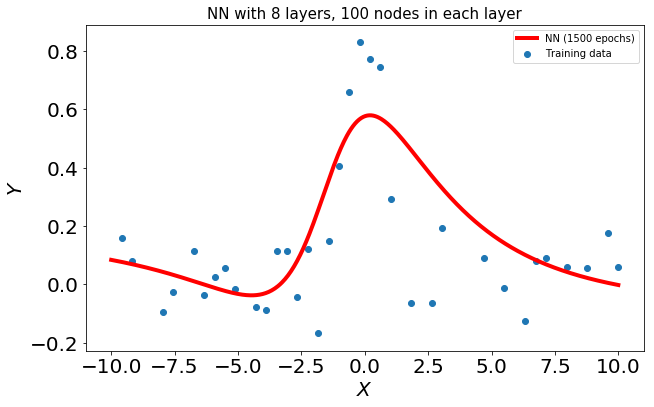

In [58]:
# use our model to predict in the range we want
num_epochs = f'{len(model5_history.epoch)}'

X_range = np.linspace(-10, 10, 500)
y_pred = model5.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN ({num_epochs} epochs)')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title(f'NN with {len(model5_history.model.layers)} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=20)

ax.legend(loc=0)
plt.show()

That seems very good. Let's see the $R^2$

In [59]:
from sklearn.metrics import r2_score as r2

In [60]:
score = model5.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score)
print('Test R2:', r2(Y_test, model5.predict(X_test)))

15/15 [==============================] - 0s 428us/step
Test loss: 0.09021387249231339
Test R2: -2.2482520675821482


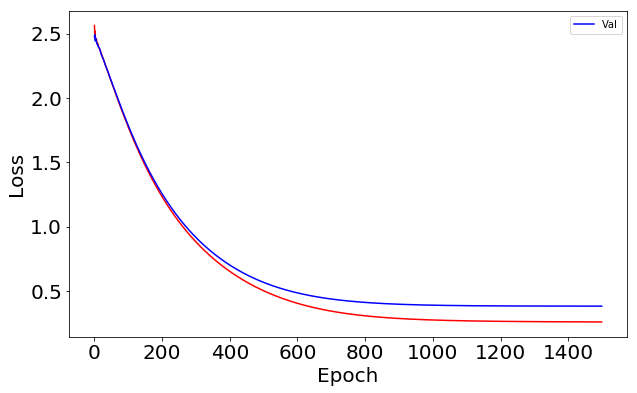

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model5_history.history['loss']), 'r')
ax.plot(np.sqrt(model5_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)